# Unused Models
> This file includes the model and code that we did not use for our final structure, But we use some output plots in this file. Also, some models were deleted when we tweaked our model.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import package

import tensorflow as tf 
tf.compat.v1.disable_v2_behavior()   
import pandas as pd
import numpy as np 
import os
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import random
import pickle
from tensorflow.keras import layers
%matplotlib inline

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
# dir of the images

dir = '/content/drive/MyDrive/MACS 37000 Project/images_training/two_Labeled_Img'

In [4]:
# check the categories

print(os.listdir(dir))

['gentrified', 'non-gentrified']


In [5]:
# show some examples

CATEGORIES = os.listdir(dir)

In [6]:
os.listdir(dir+'/gentrified')[:5]

['10501.png', '10502.png', '10702.png', '20602.png', '20901.png']

In [7]:
os.listdir(dir+'/non-gentrified')[5:10]

['10600.png', '10701.png', '20100.png', '20200.png', '20301.png']

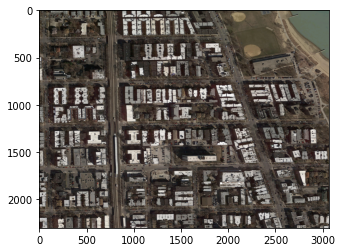

In [8]:
# gentrified

path = os.path.join(dir, 'gentrified')
img_array = cv2.imread(os.path.join(path, '10501.png'), cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
plt.show()

In [9]:
# check the shape

img_array.shape

(2304, 3072, 3)

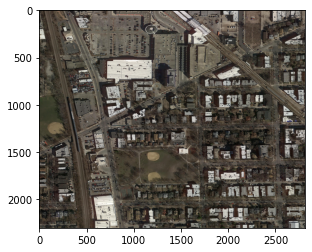

In [10]:
# non_gentrified

path = os.path.join(dir, 'non-gentrified')
img_array = cv2.imread(os.path.join(path, '10202.png'), cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
plt.show()

In [11]:
# check the shape

img_array.shape

(2304, 2816, 3)

In [12]:
# standardize the size to 2304 * 2800

IMAGE_SIZE_0 = 700
IMAGE_SIZE_1 = 576

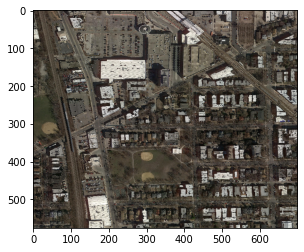

In [13]:
new_array = cv2.resize(img_array, (IMAGE_SIZE_0, IMAGE_SIZE_1))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [14]:
new_array.shape

(576, 700, 3)

In [15]:
# calss info

print(f"The class index for gentrified is {1}.")
print(f"The class index for non-gentrified is {0}.")

The class index for gentrified is 1.
The class index for non-gentrified is 0.


In [16]:
# create training data

training_data = []

def create_training_data():
  for category in CATEGORIES:
    path = os.path.join(dir, category)
    if category == 'gentrified':
      class_num = 1
    else:
      class_num = 0
    
    i = 0  
    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
      new_array = cv2.resize(img_array, (IMAGE_SIZE_0, IMAGE_SIZE_1))
      training_data.append([new_array, class_num])
      i += 1
      if i == 80:
        break

create_training_data()

In [17]:
# let's take a look at one data

training_data[4]

[array([[[150, 154, 150],
         [ 99, 102,  99],
         [117, 125, 122],
         ...,
         [ 78,  89,  99],
         [ 82,  91,  99],
         [ 82,  90,  99]],
 
        [[115, 118, 113],
         [148, 152, 150],
         [137, 142, 140],
         ...,
         [ 90,  98, 107],
         [ 82,  93,  99],
         [ 78,  88,  99]],
 
        [[117, 120, 119],
         [140, 142, 142],
         [119, 126, 128],
         ...,
         [ 84,  96, 105],
         [ 90, 100, 109],
         [ 84,  92, 101]],
 
        ...,
 
        [[163, 177, 181],
         [157, 168, 171],
         [165, 176, 181],
         ...,
         [ 68,  73,  78],
         [ 66,  73,  76],
         [ 72,  78,  82]],
 
        [[161, 173, 173],
         [163, 173, 179],
         [181, 185, 189],
         ...,
         [ 14,  19,  24],
         [ 16,  24,  27],
         [ 17,  22,  25]],
 
        [[173, 181, 183],
         [171, 176, 181],
         [181, 188, 193],
         ...,
         [ 21,  26,  28],
  

In [18]:
# process the data
random.shuffle(training_data)

X_train= []
y_train = []

for pixel, label in training_data:
  X_train.append(pixel)
  y_train.append(label)

X_train = np.array(X_train).reshape(-1, IMAGE_SIZE_0, IMAGE_SIZE_1, 3)
X_train = X_train/255.0

y_train = np.array(y_train)

In [19]:
# create test data

test_data = []

def create_test_data():
  for category in CATEGORIES:
    path = os.path.join(dir, category)
    if category == 'gentrified':
      class_num = 1
    else:
      class_num = 0
    i = 0  
    for img in os.listdir(path)[80:]:
      img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
      new_array = cv2.resize(img_array, (IMAGE_SIZE_0, IMAGE_SIZE_1))
      test_data.append([new_array, class_num])
      i += 1
      if i == 20:
        break

create_test_data()

In [20]:
# process the data

X_test= []
y_test = []

for pixel, label in test_data:
  X_test.append(pixel)
  y_test.append(label)

X_test = np.array(X_test).reshape(-1, IMAGE_SIZE_0, IMAGE_SIZE_1, 3)
X_test = X_test/255.0
y_test = np.array(y_test)

In [ ]:
# build the model 

model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=X_train.shape[1:]),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.BatchNormalization(),
        layers.Flatten(),
        layers.Dense(64),

        layers.Dense(1, activation="sigmoid"),
    ]
)

model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
# train it! 

model.fit(X_train, y_train, batch_size=16, epochs=200, validation_split=0.25)

Train on 120 samples, validate on 40 samples
Epoch 1/200
120/120 [==============================] - ETA: 0s - loss: 213.8879 - acc: 0.6583

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


120/120 [==============================] - 20s 163ms/sample - loss: 213.8879 - acc: 0.6583 - val_loss: 51.2993 - val_acc: 0.5500
Epoch 2/200
120/120 [==============================] - 3s 29ms/sample - loss: 129.0475 - acc: 0.9000 - val_loss: 50.8757 - val_acc: 0.5500
Epoch 3/200
120/120 [==============================] - 3s 29ms/sample - loss: 41.4655 - acc: 0.9333 - val_loss: 148.0470 - val_acc: 0.4500
Epoch 4/200
120/120 [==============================] - 3s 29ms/sample - loss: 24.6541 - acc: 0.9333 - val_loss: 20.9507 - val_acc: 0.4250
Epoch 5/200
120/120 [==============================] - 3s 29ms/sample - loss: 17.2681 - acc: 0.9750 - val_loss: 52.7371 - val_acc: 0.5750
Epoch 6/200
120/120 [==============================] - 3s 29ms/sample - loss: 6.7761 - acc: 0.9833 - val_loss: 30.3012 - val_acc: 0.5000
Epoch 7/200
120/120 [==============================] - 3s 29ms/sample - loss: 10.7543 - acc: 0.9750 - val_loss: 159.5288 - val_acc: 0.5500
Epoch 8/200
120/120 [====================

In [ ]:
model.save('/content/drive/MyDrive/images_training/model03')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/images_training/model03/assets


In [21]:
model = tf.keras.models.load_model('/content/drive/MyDrive/MACS 37000 Project/images_training/model01')

Instructions for updating:
Colocations handled automatically by placer.


In [22]:
# performance

test_loss0, test_acc0 = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", test_loss0)
print("Test accuracy:", test_acc0)

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Test loss: 1252.3130798339844
Test accuracy: 0.625


In [ ]:
description = 'The model performs not bad for my own training model. I did not try some pretrained model because I think many of them are irrelevant to our task. But I will try some object detection models or some models to find the embeddings of the images to help us classify the image.' #@param {type:"string"}

**3)** Perform a SHAP-based model explanation of the model you trained/fine-tuned over 3-5 examples from your dataset.

In [ ]:
! pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 564 kB 5.1 MB/s 


In [ ]:
## Pytorch

import shap
tf.keras.backend.set_learning_phase(True)

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


In [ ]:


background = X_train[np.random.choice(X_train.shape[0], 5, replace=False)]
test_images = np.array([X_test[0], X_test[1], X_test[20], X_test[19]])

In [ ]:
test_images[0].shape

(700, 576, 3)

In [ ]:
e = shap.DeepExplainer(model, background)

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


In [ ]:
shap_values = e.shap_values(test_images)

ResourceExhaustedError: ignored

In [ ]:
test_numpy = np.array([t.reshape(576, 700, 3) for t in test_images])

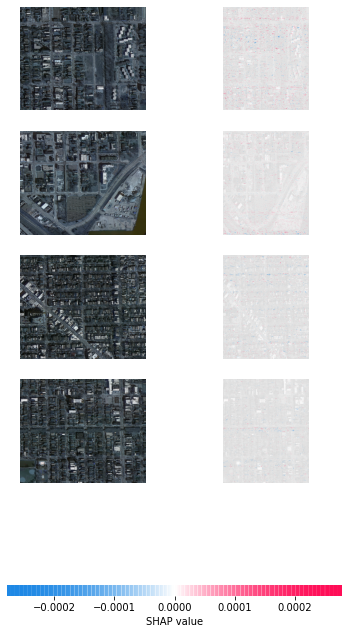

In [ ]:
shap.image_plot(shap_values, test_numpy)